# Overview of Hypothesis Testing

We will discuss basic concepts of hypothesis testing in statistics, and illustrate with coding examples. 
### Outline
- Hypothesis testing basics
- Null vs Alternative Hypothesis
- Normal Distribution, Z-scores, Standardization
- Level of Statistical Significance (alpha)
- P-value, Power
- Type I vs Type II error
- Examples (one-tailed and two-tailed tests)

## What is Hypothesis Testing?
A hypothesis is an educated guess about the state of the world that can be verified by an experiment or observation. Hypothesis testing is commonly used in scientific experiments as a precise and rigorous way to verify results.


## Types of Hypotheses
We usually compare two hypotheses against each other. 

The **null hypothesis**, denoted by $H_0$ usually denotes the status quo. It is the hypothesis that the given variable **has no effect**. Basically, the null says "nothing interesting happened during the experiment". 

The **alternative hypothesis(es)**, denoted by $H_1$ or $H_A$, is the opposite of the null. It is the hypothesis that the given observations on a sample are due to the real effect of a given variable, **not** by random chance. 


> Simple example:
We have a sample dataset of student observations with two attributes available: test score and number of chat messages sent to the prof. The null hypothesis would be "The number of chat message have no effect on test score." The alt. hypothesis would be "If a student sends a higher number of chat messages, then she will have a higher test score."


## Normal Distribution, Standardization, Z-scores

The Normal, or Gaussian, Distribution has a *bell-shaped curve*. It's a common type of continuous probability distribution. We can write 
$$ X \sim N(\mu, \sigma^2) $$

To indicate that the random variable X is normally distributed with mean $\mu$ equal to zero and having unit variance $\sigma^2$. This means the variance, and the std. deviation, tends towards 1 as the sample size *n* stretches to infinity.

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/525px-Standard_deviation_diagram.svg.png">

### Why do we care about the normal distribution?
The normal distribution is important because of the **Central Limit Theorem**. If you have a population (with unknown mean and variance) and repeatedly take large enough samples, then the distribution of all those samples' means $\bar{X}$ will be approximately normally distributed. The curve will look and more like a bell shape.

## What's a Z-score?
Closely related to the idea of a normal distribution is the unit of measurement called a **Z-Score**.

It describes the distance of an observation from the population mean. Thus, we need to know what the population mean and standard dev. are, in order to use it.

Given an observation, the **Z-Score** is the **number of standard deviations it's away from the mean**. It's a way to compare a single observation to the entire population on average. For example, if we are given one student's test score, it would be useful to know how he scored compared to the rest of the class.

Formula for Z-Score, given observation value x:
$$ Z = \frac{X-\mu}{\sigma} $$




## What is Statistical Significance?
Following an experiment or observation, we want to know if the results are "significant" or relevant. Statistical significance indicates whether a result is really caused by an effect, or if it's just random chance. E.g. do we really know if the more a student chats to the prof, the higher her score will be? Or is it just random chance?

If a statistic, such as sample mean $\bar{x}$, has high significance, then it's very **unlikely** for the null hypothesis to be true.

## What is Significance Level?
The significance level, denoted by $\alpha$, is the probability of rejecting the null hypothesis, *given the null is assumed to be true*. We usually pre-set the significance level to a certain threshold, like 5%, before collecting results.

## What is P-value?
The p-value is the probability of getting an observation that is *as extreme (as small or as large)* as our test statistic, *given that the null is assumed to be true*. Therefore, if we get a reaaally tiny p-value, then it's unlikely that the null hypothesis is true. And a small p-value is a "good thing" if we want to prove our alt. hypothesis.

We say the results of an experiment are "statistically significant" when the p-value is *less than or equal to* the significance level $\alpha$.

In other words, **reject the null hypothesis** in favor of the alternative hypothesis if 
$$ p \leq \alpha $$

<img src="https://www.simplypsychology.org/p-value.png">

By the example graphic of a *one-tailed test*, we can see the very unlikely situations (if the null were true) to be on the tail ends of the distribution. If the observation falls where the dark green text indicates, then the p-value is represented by that shaded region. Since it's smaller than the significance level (it goes past the 95% threshold), we can say the results are statistically significant.

## Type I vs Type II Error

<img src="https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/sas/sas4-onesamplettest/Figure1.PNG">

If the null hypothesis is true, but we accidentally reject it anyway in favor of the alternative, then we made a **Type I Error**.
If the null hypothesis is false, but we failed to reject it, then we made a **Type II Error**.

> Example: A doctor is evaluating the results of a pregnancy test. Null hypothesis is that the patient is NOT pregnant. If the patient really is NOT pregnant (e.g. ran the test on a man), but we reject the null and say he is pregnant, then we made a Type I error. If the patient IS pregnant (e.g. ran the test on an actual pregnant woman), but we fail to reject the null and we say she is not pregnant, then we made a Type II error.

<img src="https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog.jpg">

## What is Power?

Power is "kind of like the opposite of significance level". 

**Power is the probability of rejecting the null hypothesis, given the null is false and the alternative is true.**

Power is the same as the probability of avoiding a Type II error. It's the probability of having a true result.

> In the above example, power is "how likely are we to correctly predict a patient is pregnant?". E.g. if power = 99.99%, then it's like our pregnancy test is pretty good.

Real world uses: Power analyses is usually done *before* scientists run an experiment. An estimate of power can tell us how large our sample size needs to be in order to conduct a good study.

## Examples of Hypothesis Tests

Now, let's get into some actual examples of doing hypothesis tests, using Python and the `statsmodels` package.

In [1]:
import statsmodels.api as sm
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Z-Score Example (One-Tailed Test)

In previous years, about 52 % of the inhabitants of Zortela believe the sporadic famines were due to anger from the rain gods. Do more inhabitants believe that the famines were due to divine anger, or more who believe in other reasons?

Population: Inhabitants of Zortela

Parameter of Interest: p (proportion who believe in divine anger)

Data: 1020 people were surveyed. 54% believed the famines were caused by retribution from the gods above. 



*Null: The percentage of people who believe rain gods caused the famine is the same as last year (52%) and hasn't changed.*

*Alt: The percentage of people who do believe rain gods caused the famine is about the same as last year.*

In [2]:
## Use statsmodels
n = 1020
p_null = 1 - 0.54 
p_alt = 0.56

In [3]:
sm.stats.proportions_ztest(p_alt * n, n, p_null, alternative='larger')
## returns (zstat, p-value)

(6.433980408433334, 6.215244431942899e-11)

What does this result tell us? The Z-score is large, and the p-value is very small. We can therefore *reject* the null hypothesis. This indicates that the chance that the proportion is greater than 52% is likely, informally speaking. 

Maybe more people started believing in rain gods this year, for some reason such as the famines worsening? Who knows!

## T-Test 
## Example of Difference in Population Proportion

Research Question: Is there a significant different between the population proportions of parents of Asian children and the parents of Hispanic children who report that their kid has taken swimming lessons?

Population: All Asian parents with kids aged 6-18, denoted by $p1$, and all Hispanic parents with kids aged 6-18, denoted by $p2$

Parameter: $ p1 - p2 $

In [4]:
n1 = 247
# n1 = 5000
p1 = .37

n2 = 308
# n2 = 5000
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)
sm.stats.ttest_ind(population1, population2)
## returns (t-stat, p-value, deg of freedom)

(1.7067314744685356, 0.0884333620625203, 553.0)

Since the p-value is quite high at around 0.202, we *cannot reject the null*. In other words, there's no statistically significant difference between these two populations.

*! Note ! What happens if we increase the number of parents surveyed? See the commented-out lines above. Even though it's random, sometimes the p-value in this case will be low enough to reject the null. So it all depends!*

## Two Tailed Test
## Difference in population Means

Research Question
Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index (BMI) than females?

Population: Adults in the data set

Parameter: $\mu_1 - \mu_2$ , the difference in mean BMI between male and female 

Null: No difference between male and female BMI.


In [5]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
df = pd.read_csv(url)
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [6]:
females = df[df['RIAGENDR'] == 2]
males = df[df['RIAGENDR'] == 1]
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()
n2 = len(males)
mu2 = males["BMXBMI"].mean()
sd2 = males["BMXBMI"].std()

In [7]:
sm.stats.ztest(females["BMXBMI"].dropna(), males["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

The p-value is very small, we can reject the null that assumes male BMI is same as female BMI. The results show there is a significant difference. 

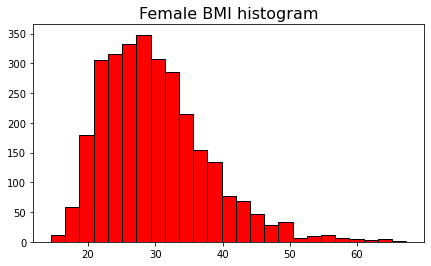

In [8]:
## Plot data to check for normality
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='red',bins=25)
plt.show()

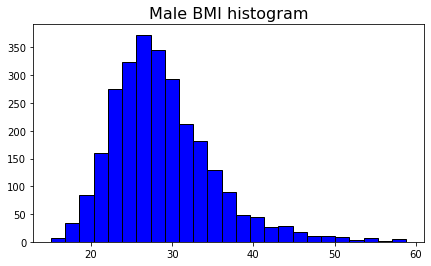

In [9]:
plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(males["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()

Note how both distributions are right-skewed. So there are a few outliers/unusual cases on the very high ends of the spectrum. And the mean is greater than the median. Most values are clustered to the left side of the graph.

Since the data is skewed, we might try standardizing the data to have more reliable results.

In [48]:
## normalize data to be between 0 and 1
from sklearn import preprocessing

fem1 = females["BMXBMI"].dropna().values.reshape(-1,1)
male1 = males["BMXBMI"].dropna().values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
fem_scaled = min_max_scaler.fit_transform(fem1)
male_scaled = min_max_scaler.fit_transform(male1)

In [56]:
## find outlers using std dev
def find_outliers(arr):
    mean, std = np.mean(arr), np.std(arr)
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    outliers = [x for x in arr if x < lower or x > upper]
    return outliers

def drop_outliers(arr):
    mean, std = np.mean(arr), np.std(arr)
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    drop_outliers = np.array([x for x in arr if x >= lower or x <= upper])
    return drop_outliers


In [57]:
fem2 = drop_outliers(fem_scaled)
male2 = drop_outliers(male_scaled)

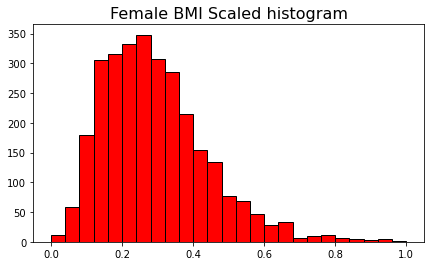

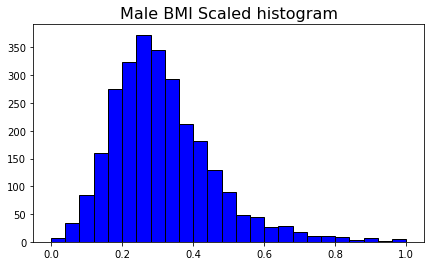

In [61]:
# plot after normalizing both datasets
# with outliers dropped
plt.figure(figsize=(7,4))
plt.title("Female BMI Scaled histogram",fontsize=16)
plt.hist(fem2,edgecolor='k',color='red',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI Scaled histogram",fontsize=16)
plt.hist(male2,edgecolor='k',color='blue',bins=25)
plt.show()